In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [2]:
# Read data and look at first few rows
file_path = "D:/CapstoneProject/bajaj_finserv_capstone/Daily_work/New DataSet/Cleaned Data/"
file_name = "BajajDataset_Cleaned_left.csv"
df = pd.read_csv(file_path+file_name)
df.head()

InvoiceDate    DealerState Segment  Enquiry_flag  Booking_flag  \
0     00:00.0        Haryana      M1             1             1   
1     00:00.0  Uttar Pradesh      M3             1             1   
2     00:00.0  Uttar Pradesh      M1             1             1   
3     00:00.0  Uttar Pradesh      M1             1             1   
4     00:00.0  Uttar Pradesh      M1             1             1   

     PAYMENT_TYPE   CustomerCode           InvoiceNo  LoanTaken    LeadType  \
0  Loan not taken  CUS-272013139  ASDA272011800034_1          0  No Enquiry   
1  Loan not taken  CUS-274651284  ASDA274651800055_1          0  No Enquiry   
2  Loan not taken   CUS-28970748  ASDA289701800008_1          0  No Enquiry   
3  Loan not taken  CUS-295861155  ASDA295861800014_1          0  No Enquiry   
4  Loan not taken    CUS-6568346  ASDA656831800022_1          0  No Enquiry   

  TestRideOffered    FollowUp SourceOfEnquiry FollowUpDone BranchType  \
0      No Enquiry  No Enquiry      No Enquiry   No Enquiry      Urban   
1      No Enquiry  No Enquiry      No Enquiry   No Enquiry      Urban   
2      No Enquiry  No Enquiry      No Enquiry   No Enquiry      Urban   
3      No Enquiry  No Enquiry      No Enquiry   No Enquiry      Urban   
4      No Enquiry  No Enquiry      No Enquiry   No Enquiry      Urban   

   TotalAmount       City          State     DealerCity ModelFamily  
0      38081.0    Gurgaon        HARYANA     DHUNDAHERA    Splendor  
1      64326.0  Allahabad  UTTAR PRADESH         SORAON         CBZ  
2      38081.0  Allahabad  UTTAR PRADESH   Hanuman Ganj    Splendor  
3      38081.0  Allahabad  UTTAR PRADESH  Bharwari (NP)    Splendor  
4      46481.0  Allahabad  UTTAR PRADESH   MIYA KA PURA   Star city

In [3]:
df['totalamount_bin'] = pd.cut(df['TotalAmount'], [0, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000], 
                              labels=['0-30000', '30000-40000', '40000-50000', '50000-60000','60000-70000','70000-80000','80000-90000', '90000-100000','100000-110000','110000-120000','120000-130000', '130000-140000', '140000-150000', '150000-160000', '160000-170000', '170000-180000', '180000-190000', '190000-200000'])

In [4]:
df.head()

InvoiceDate    DealerState Segment  Enquiry_flag  Booking_flag  \
0     00:00.0        Haryana      M1             1             1   
1     00:00.0  Uttar Pradesh      M3             1             1   
2     00:00.0  Uttar Pradesh      M1             1             1   
3     00:00.0  Uttar Pradesh      M1             1             1   
4     00:00.0  Uttar Pradesh      M1             1             1   

     PAYMENT_TYPE   CustomerCode           InvoiceNo  LoanTaken    LeadType  \
0  Loan not taken  CUS-272013139  ASDA272011800034_1          0  No Enquiry   
1  Loan not taken  CUS-274651284  ASDA274651800055_1          0  No Enquiry   
2  Loan not taken   CUS-28970748  ASDA289701800008_1          0  No Enquiry   
3  Loan not taken  CUS-295861155  ASDA295861800014_1          0  No Enquiry   
4  Loan not taken    CUS-6568346  ASDA656831800022_1          0  No Enquiry   

   ...    FollowUp SourceOfEnquiry FollowUpDone BranchType TotalAmount  \
0  ...  No Enquiry      No Enquiry   No Enquiry      Urban     38081.0   
1  ...  No Enquiry      No Enquiry   No Enquiry      Urban     64326.0   
2  ...  No Enquiry      No Enquiry   No Enquiry      Urban     38081.0   
3  ...  No Enquiry      No Enquiry   No Enquiry      Urban     38081.0   
4  ...  No Enquiry      No Enquiry   No Enquiry      Urban     46481.0   

        City          State     DealerCity ModelFamily totalamount_bin  
0    Gurgaon        HARYANA     DHUNDAHERA    Splendor     30000-40000  
1  Allahabad  UTTAR PRADESH         SORAON         CBZ     60000-70000  
2  Allahabad  UTTAR PRADESH   Hanuman Ganj    Splendor     30000-40000  
3  Allahabad  UTTAR PRADESH  Bharwari (NP)    Splendor     30000-40000  
4  Allahabad  UTTAR PRADESH   MIYA KA PURA   Star city     40000-50000  

[5 rows x 21 columns]

In [5]:
df_copy = df.copy()

In [6]:
df = df.drop(columns = ['TestRideOffered', 'CustomerCode', 'Enquiry_flag', 'Booking_flag', 'InvoiceNo', 'FollowUpDone', 'LeadType', 'TotalAmount', 'PAYMENT_TYPE', 'DealerCity', 'DealerState', 'LoanTaken'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386656 entries, 0 to 386655
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   InvoiceDate      386656 non-null  object  
 1   Segment          386656 non-null  object  
 2   FollowUp         386656 non-null  object  
 3   SourceOfEnquiry  386656 non-null  object  
 4   BranchType       386656 non-null  object  
 5   City             386656 non-null  object  
 6   State            386656 non-null  object  
 7   ModelFamily      386656 non-null  object  
 8   totalamount_bin  386656 non-null  category
dtypes: category(1), object(8)
memory usage: 24.0+ MB


In [8]:
Tier1 = ['Bengaluru','Chennai','Delhi','Hyderabad','Kolkata','Mumbai','Ahmedabad','Pune']
Tier2 = ['Agra','Aligarh','Amravati','Asansol','Bareilly','Bhavnagar','Bhopal','Bikaner','Bokaro Steel City',
         'Coimbatore','Dehradun','Bhilai','Erode','Firozabad','Gorakhpur','Guntur','Gurgaon','Hubli','Dharwad',
         'Indore','Jaipur','Jammu','Jamshedpur','Jodhpur','Kannur','Kochi','Kolhapur','Kota','Kurnool',
         'Lucknow','Malappuram','Goa','Meerut','Mysore','Nanded','Nellore','Palakkad','Perinthalmanna','Purulia',
         'Rajkot','Ranchi','Salem','Shimla','Solapur','Thiruvananthapuram','Tiruchirappalli','Tirupati','Tiruppur',
         'Ujjain','Vadodara','Vasai','Virar City','Vellore','Surat','Ajmer','Allahabad','Amritsar','Aurangabad',
         'Belgaum','Bhiwandi','Bhubaneswar','Bilaspur','Chandigarh','Cuttack','Dhanbad','Durgapur','Faridabad',
         'Ghaziabad','Gulbarga','Gwalior','Guwahati','Hamirpur','Jabalpur','Jalandhar','Jamnagar','Jhansi','Kakinada',
         'Kanpur','Kottayam','Kollam','Kozhikode','Ludhiana','Madurai','Mathura','Mangalore','Moradabad','Nagpur',
         'Nashik','Noida','Patna','Pondicherry','Raipur','Rajahmundry','Rourkela','Sangli','Siliguri','Srinagar',
         'Thrissur','Tirur','Tirunelveli','Tiruvannamalai','Bijapur','Varanasi','Vijayawada','Warangal','Visakhapatnam']


In [9]:
# function to convert the city names to their respective tiers
def city_tiers(x):
    x = x.title()
    if x in Tier1: return "Tier1"
    elif x in Tier2: return "Tier2"
    else: return 'Tier3'

In [10]:
    df['City'] = df['City'].apply(city_tiers)
    # df['DealerCity'] = df['DealerCity'].apply(city_tiers)

In [11]:
le = LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

InvoiceDate  Segment  FollowUp  SourceOfEnquiry  BranchType  City  State  \
0            0        0         4               16           2     1     12   
1            0        2         4               16           2     1     32   
2            0        0         4               16           2     1     32   
3            0        0         4               16           2     1     32   
4            0        0         4               16           2     1     32   

   ModelFamily  totalamount_bin  
0            6                9  
1            2               12  
2            6                9  
3            6                9  
4            7               10

Sample prediction to get Silhoutte Score
======

Choosing K 
---------

In [12]:
sample = df.sample(frac = 0.2)

In [13]:
cost = []
sil_score = []
for num_clusters in list(range(2,11)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(sample)
    cost.append(kmode.cost_)
    labels = kmode.labels_ 
    score = metrics.silhouette_score(sample, labels)
    sil_score.append(score)
    print("Cost: ", cost)
    print("Silhoutte Score: ", score)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 327840.0
Cost:  [327840.0]
Silhoutte Score:  -0.003043446292556327
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7500, cost: 296448.0
Run 1, iteration: 2/100, moves: 6630, cost: 291310.0
Run 1, iteration: 3/100, moves: 2415, cost: 289646.0
Run 1, iteration: 4/100, moves: 1556, cost: 289646.0
Cost:  [327840.0, 289646.0]
Silhoutte Score:  -0.024597798239624002
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6043, cost: 282989.0
Run 1, iteration: 2/100, moves: 7030, cost: 276039.0
Run 1, iteration: 3/100, moves: 5394, cost: 273234.0
Run 1, iteration: 4/100, moves: 1285, cost: 273234.0
Cost:  [327840.0, 289646.0, 273234.0]
Silhoutte Score:  -0.07004146297825145
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run

In [14]:
print(list(range(2,11)))
print(cost)
print(sil_score)

[2, 3, 4, 5, 6, 7, 8, 9, 10]
[327840.0, 289646.0, 273234.0, 268052.0, 260867.0, 248480.0, 234912.0, 230921.0, 219014.0]
[-0.003043446292556327, -0.024597798239624002, -0.07004146297825145, -0.06340373982605513, -0.06523708959802997, -0.06854949978746361, -0.07983041590834543, -0.0782518506985259, -0.09778752061101459]


Text(0.5, 1.0, 'Best number of clusters')

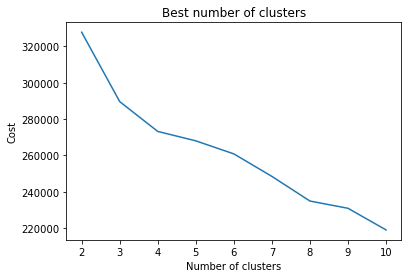

In [15]:
y = np.array([i for i in range(2,11,1)])
plt.plot(y,cost)
plt.ylabel("Cost")
plt.xlabel("Number of clusters")
plt.title("Best number of clusters")

<function matplotlib.pyplot.show(*args, **kw)>

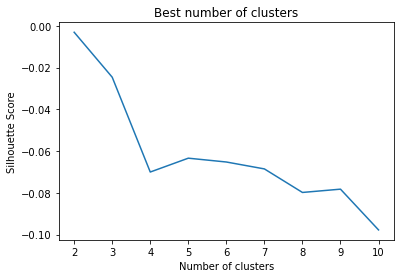

In [16]:
plt.plot(list(range(2,11)), sil_score)
plt.ylabel("Silhouette Score")
plt.xlabel("Number of clusters")
plt.title("Best number of clusters")
plt.show

End of Sample prediction
==========

In [ ]:
# sil_score = []
# for i in range(2,11):
#     km_cao1 = KModes(n_clusters=i, init = "Cao", n_init = 1, verbose=1)
#     fitClusters_cao1 = km_cao1.fit_predict(sample)
#     labels = km_cao1.labels_ 
#     score = metrics.silhouette_score(sample, labels)
#     print(score)
#     sil_score.append(score)

Checking Dunn Index
============

In [ ]:
km_cao = KModes(n_clusters=4, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df)

In [ ]:
# Predicted Clusters
fitClusters_cao

In [ ]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df.columns
clusterCentroidsDf

In [ ]:
df = df_copy.reset_index()

In [ ]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)
combinedDf.head()

In [ ]:
# for i in range(0,4):
#     cluster_df = combinedDf[combinedDf['cluster_predicted'] == i]
#     cluster_df = cluster_df.drop(['totalamount_bin', 'cluster_predicted'], axis=1)
#     cluster_df.to_csv(r'D:\CapstoneProject\bajaj_finserv_capstone\Daily_work\Algorithms\Clustering Algorithms\Clusters\cluster_'+str(i)+'.csv', index=False)

In [ ]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]
cluster_3 = combinedDf[combinedDf['cluster_predicted'] == 3]
# cluster_4 = combinedDf[combinedDf['cluster_predicted'] == 4]
# cluster_5 = combinedDf[combinedDf['cluster_predicted'] == 5]
# cluster_6 = combinedDf[combinedDf['cluster_predicted'] == 6]
# cluster_7 = combinedDf[combinedDf['cluster_predicted'] == 7]

In [ ]:
# plt.subplots(figsize = (15,5))
# sns.countplot(x=combinedDf['FollowUp'],order=combinedDf['FollowUp'].value_counts().index,hue=combinedDf['cluster_predicted'])
# plt.show()

In [ ]:
# plt.subplots(figsize = (15,5))
# sns.countplot(x=combinedDf['LoanTaken'],order=combinedDf['LoanTaken'].value_counts().index,hue=combinedDf['cluster_predicted'])
# plt.show()

One Hot Encoding
===========

In [ ]:
# df_oh = df_copy

In [ ]:
# to_ohe = ['Segment','LeadType','TestRideOffered','FollowUp',
#             'SourceOfEnquiry','BranchType','City','State','DealerCity','ModelFamily']
# not_to_ohe = ['Enquiry_flag','Booking_flag','TotalAmount','LoanTaken']

In [ ]:
# # Convert categorical values into OHE
# ohe_encoder = OneHotEncoder(sparse=False) 

# ohe_cluster_df = pd.DataFrame()

# for column in to_ohe:
#     ohe_df = pd.DataFrame(ohe_encoder.fit_transform(df_oh[column].values.reshape(-1,1)))
#     ohe_df.columns = list(map(lambda x: column + "_" + x[3:],ohe_encoder.get_feature_names()))
#     ohe_cluster_df = pd.concat([ohe_cluster_df,ohe_df],axis=1)
    
# oh_df = pd.concat([ohe_cluster_df,df_oh[not_to_ohe]],axis=1)
# oh_df.head()

In [ ]:
# sample = oh_df.sample(frac = 0.1)

In [ ]:
# km_cao2 = KModes(n_clusters=4, init = "Cao", n_init = 1, verbose=1)
# fitClusters_cao2 = km_cao2.fit_predict(sample)

In [ ]:
# Predicted Clusters
# fitClusters_cao2

In [ ]:
# labels = km_cao2.labels_
# print(set(labels))
# print(metrics.silhouette_score(sample, labels))